# Decision Tree Classifier

### Import Library Needed

In [5]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import plot_tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

ImportError: cannot import name 'plot_tree' from 'sklearn' (C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\__init__.py)

### Import Iris Data

In [2]:
data = load_iris(as_frame=True)
X, y = data.data, data.target

X.assign(Type=data.target_names[y])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df = pd.read_csv('data/letter-recognition.csv')
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Make Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, train_size=0.8)

clf_entropy = DecisionTreeClassifier()

clf_entropy.fit(X_train, y_train)

# plt.figure()
# plot_tree(clf_entropy, filled=True, feature_names=data.feature_names,  
#                      class_names=data.target_names, rounded=True);

DecisionTreeClassifier()

### Tree visualization with the `graphviz` library
If you use the conda package manager, the graphviz binaries and the python package can be installed with `conda install python-graphviz`. Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with `pip install graphviz`.

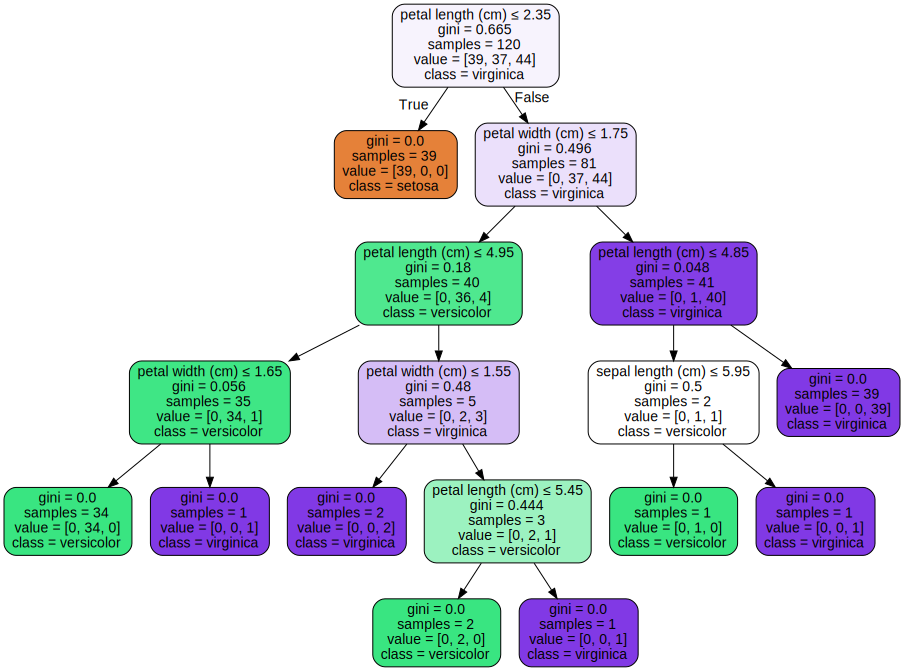

In [11]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(clf_entropy, out_file=None, 
                     feature_names=data.feature_names,  
                     class_names=data.target_names,  
                     filled=True, rounded=True,
                     special_characters=True)

graph = graphviz.Source(dot_data)  
graph 

<IPython.core.display.Javascript object>


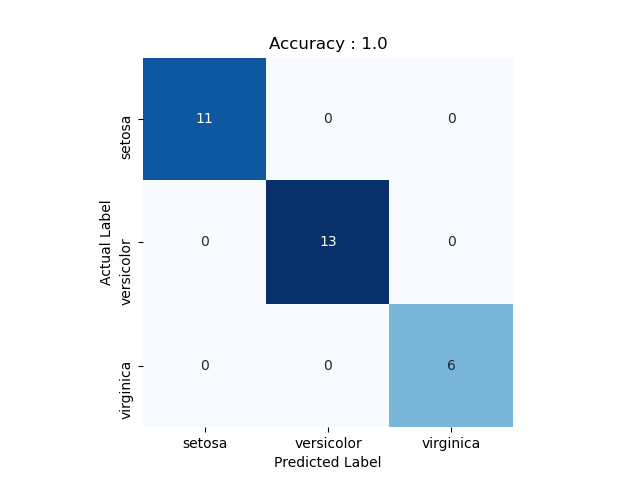

Text(0.5, 1.0, 'Accuracy : 1.0')

In [15]:
y_pred = clf_entropy.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, square=True, cmap='Blues', xticklabels=data.target_names,
           yticklabels=data.target_names, cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Accuracy : {:.3}'.format(accuracy))

In [18]:
clf_entropy.predict([[0.4,1,2.3,2.5]])

array([0])